<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import cluster
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Fit DBSCAN on a generated dataset


We will start with a simple generated dataset. 

Import the `make_circles` function from `sklearn.datasets`. You can use this to generate some clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

### 1. Plot the generated circles data

In [2]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

In [8]:
circles_X, circles_y

(array([[-0.08769568,  1.08597835],
        [-0.83755821,  0.54731034],
        [ 0.79684284,  0.41149548],
        ...,
        [ 0.28197613, -0.99058106],
        [-0.13945495, -0.99992483],
        [-0.06902609,  0.09488232]]),
 array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 

### 2. Rescale the data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X = scaler.fit_transform(circles_X)

### 3. Fit DBSCAN on the rescaled data

In [31]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X)


DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

### 4. Extract the cluster labels.

In [32]:
print("Labels:")
labels = dbscan.labels_
print(labels)


Labels:
[ 0  0  0  1  0  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1
  1  1  1  0  1  0  1  0  1  0  1  1  0  0  0  1  1  0  1  0  1  1  0  1
  0  0  0  1  1  1  0 -1  1  0  1  0  1  1  0  1  0  1  1  1  1  0  0  1
  1  0  1  1  1  1  0  1  0  0  1  0  1  0  1  1  0  0  1  1  1  0  0  1
  1  1  1  1  1  1  1  1  1  1  0  1  1  0  1  1  0  0  0  0  1  1  0  1
  1  1  0  1  1  0  1  0 -1  0  1  0  1  0  0  1  1  0  1  1  0  1  0  0
  0  1  1  0  1  0  1  0  1  1  0  1  0  0  0  1  0  1  0  0  0  0  1  0
  0  0  1  1  1  1  1  0  1  0  1  0  0  0  1  0  0  1  1  0  0  1  0  0
  1  1  0  0 -1  1  0  0  1  1  1  1  0  1  0  0  1  0  0  1  1  0  1  1
  1  0  1  0  1  1  0  1  0  1  0  1  1  0  0  1  0  1  0  0  0  1  0  0
  1  1  1  0  0  1  0  0  1  0  1  1  0 -1  0  0  1  0  1  0  0  1  1  0
  0  0  0  1  0  0  0  1  1  1  0  0  1  0  1  1  1  0  1  0  0  1  0  1
  1  1  1  1  1  1  0  1  1  0  1  0  0  0  0  0  0  1  0  0  0  1  1  0
  0  0  0  0  0  0  0  1  0  1  0  0  1  0 

In [33]:
print(dbscan.core_sample_indices_)


[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  56  57
  58  59  60  61  62  63  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 152
 153 154 155 156 158 159 160 161 162 163 164 165 166 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 197 198 199 200 201 202 203 204 205 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 254 255 256 257 258 259 260 26

In [34]:
core_samples = np.zeros_like(labels, dtype=bool)
core_samples


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
core_samples[dbscan.core_sample_indices_] = True
core_samples


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [36]:
print("Core samples")
print((core_samples * 1))


Core samples
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1

### 5. How many clusters do you get?

In [37]:
# I got 2,  0 and 1
# if i set eps small 0.3 and minipoints big like 10, I got 3 clusters

In [38]:
n_clusters_ = len(set(labels) - set([-1]))
print(n_clusters_)

2


### 6. Evaluate DBSCAN

- Visually
- With silhouette score
- Using the true `y`, with homogeneity, completeness and V-measure score

In [50]:
print()
print('Estimated number of clusters:\t %d' % n_clusters_)
print("Homogeneity:\t\t\t %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness:\t\t\t %0.3f" % metrics.completeness_score(y, labels))
print("V-measure:\t\t\t %0.3f" % metrics.v_measure_score(y, labels))
print("Silhouette Coefficient:\t\t %0.3f"
      % metrics.silhouette_score(X, labels))



Estimated number of clusters:	 2
Homogeneity:			 1.000
Completeness:			 0.955
V-measure:			 0.977
Silhouette Coefficient:		 0.221


# Silhouette Coefficient:		 0.221
why is this one so low? because of its calculation method?

In [ ]:
all the same color in the same cluster
all the red ones are together, even there might be other colors

In [39]:
np.unique(circles_y)

array([0, 1])

In [43]:
y=circles_y

In [41]:
def color_map(x):
    if x == 0:
        return 'r'
    elif x == 1:
        return 'b'
    elif x == -1:
        return 'g'
    else:
        return 'k'


def symbol_map(x):
    if x == 0:
        return 'x'
    elif x == 1:
        return 'o'
    elif x == 2:
        return 'd'

Cluster color: -1 -> g
Cluster color: 0 -> r
Cluster color: 1 -> b
Class 0: x
Class 1: o
Class 2: d


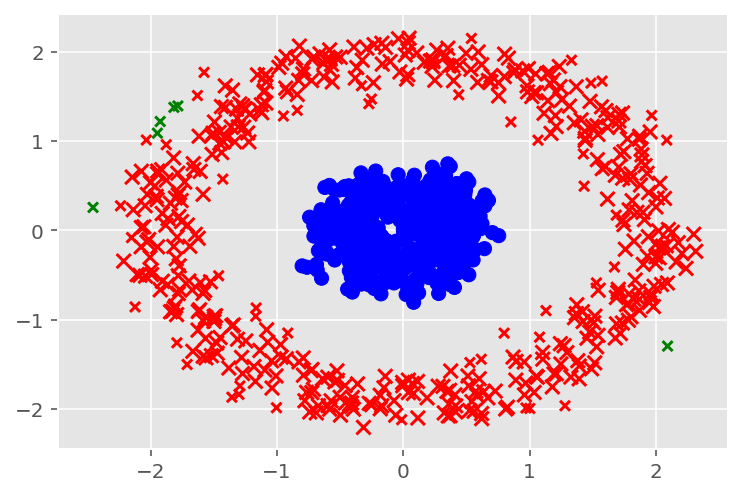

In [44]:
sizes = [25, 50]

for i in range(-1, 2):
    
    print('Cluster color: {} -> {}'.format(i, color_map(i)))
    
# loop over different classes    
for i in range(3):
    
    print('Class {}: {}'.format(i, symbol_map(i)))
    
    # loop over core and non-core samples
    for j in [True, False]:
        
        plt.scatter(X[(y == i) & (core_samples == j), 0], 
                    X[(y == i) & (core_samples == j), 1],
                    # use different colors for different cluster labels
                    c=[color_map(x) for x in labels[(y == i) & (core_samples == j)]], 
                    s=sizes[j],
                    # use different markers for different calsses
                    marker=symbol_map(i))
plt.show()

In [ ]:
# for some reason, there are 2 clusters, the rest are categorized as 
# outliers.

### 7.  Extract the core samples. 

How many do you have?

In [45]:
cores = dbscan.core_sample_indices_


In [49]:
cores.shape

(948,)

### 8. Create a scatter plot of the data with coloring according to the cluster labels

## Bonus:

### Try k-means and hierarchical clustering. Which differences do you observe? Which algorithm do you find most suitable in each case? 

In [51]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [74]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(X)
X = pd.DataFrame(X, columns=['x', 'y'])


In [75]:
cluster_labels = model.labels_
cluster_labels.shape

(1000,)

In [83]:
np.unique(cluster_labels)

array([0, 1], dtype=int32)

In [76]:
centroids = model.cluster_centers_
centroids

array([[ 0.2196493 ,  0.26466646,  0.19614148],
       [-0.3614335 , -0.43550937,  3.0026455 ]])

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')


In [78]:
X["clusters"]=cluster_labels

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 2, 'y' with size 2.

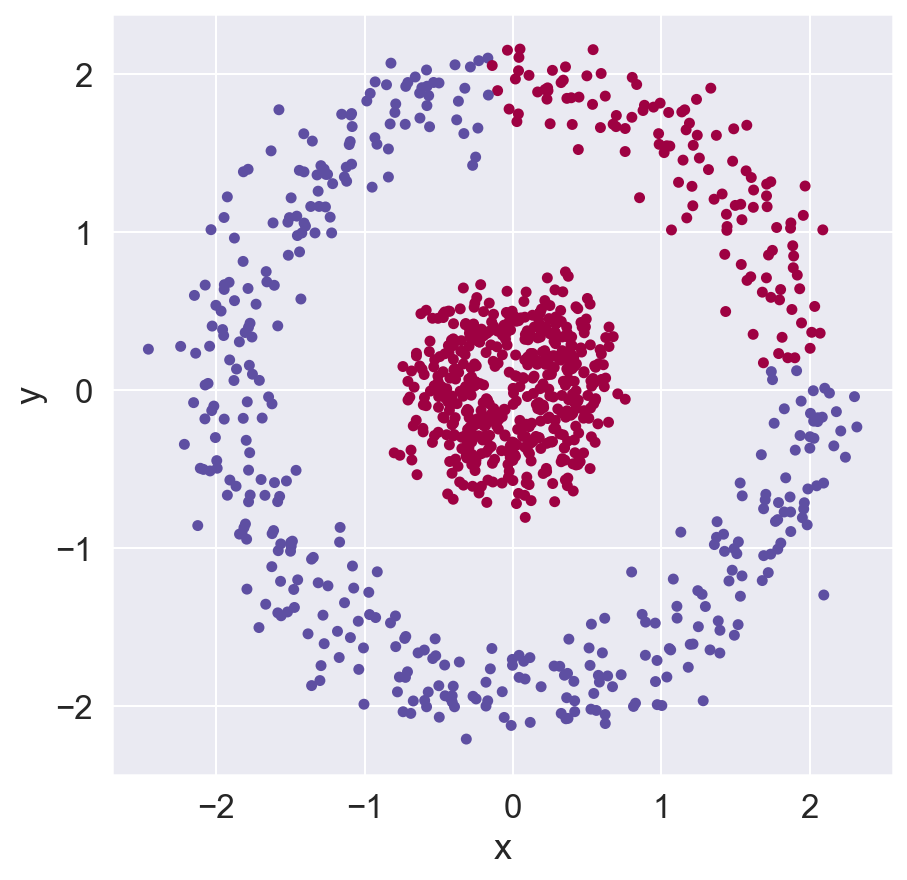

In [79]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
X.plot(x="x", y="y", kind="scatter", c=X['clusters'], colormap='Spectral', ax=ax, colorbar=False)
ax.scatter(centroids[:,0], centroids[:,1], marker='o', s=150, alpha=.7, c=range(0,3), 
            cmap='Spectral')
plt.show()


In [80]:
from sklearn.cluster import AgglomerativeClustering

In [81]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [82]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([796, 204]))

In [95]:
Z = linkage(X, method='single', metric='euclidean')
Z.shape

(999, 4)

In [96]:
link = pd.DataFrame(Z, columns=['cluster_index_left', 'cluster_index_right', 'distance', 'support'])
link.head(10)

,cluster_index_left,cluster_index_right,distance,support
0,233.0,288.0,0.002125,2.0
1,581.0,829.0,0.002483,2.0
2,608.0,756.0,0.003157,2.0
3,53.0,212.0,0.003359,2.0
4,45.0,892.0,0.003610,2.0
5,296.0,1002.0,0.003911,3.0
6,231.0,962.0,0.004260,2.0
7,92.0,95.0,0.004280,2.0
8,405.0,513.0,0.004838,2.0
9,688.0,742.0,0.005072,2.0


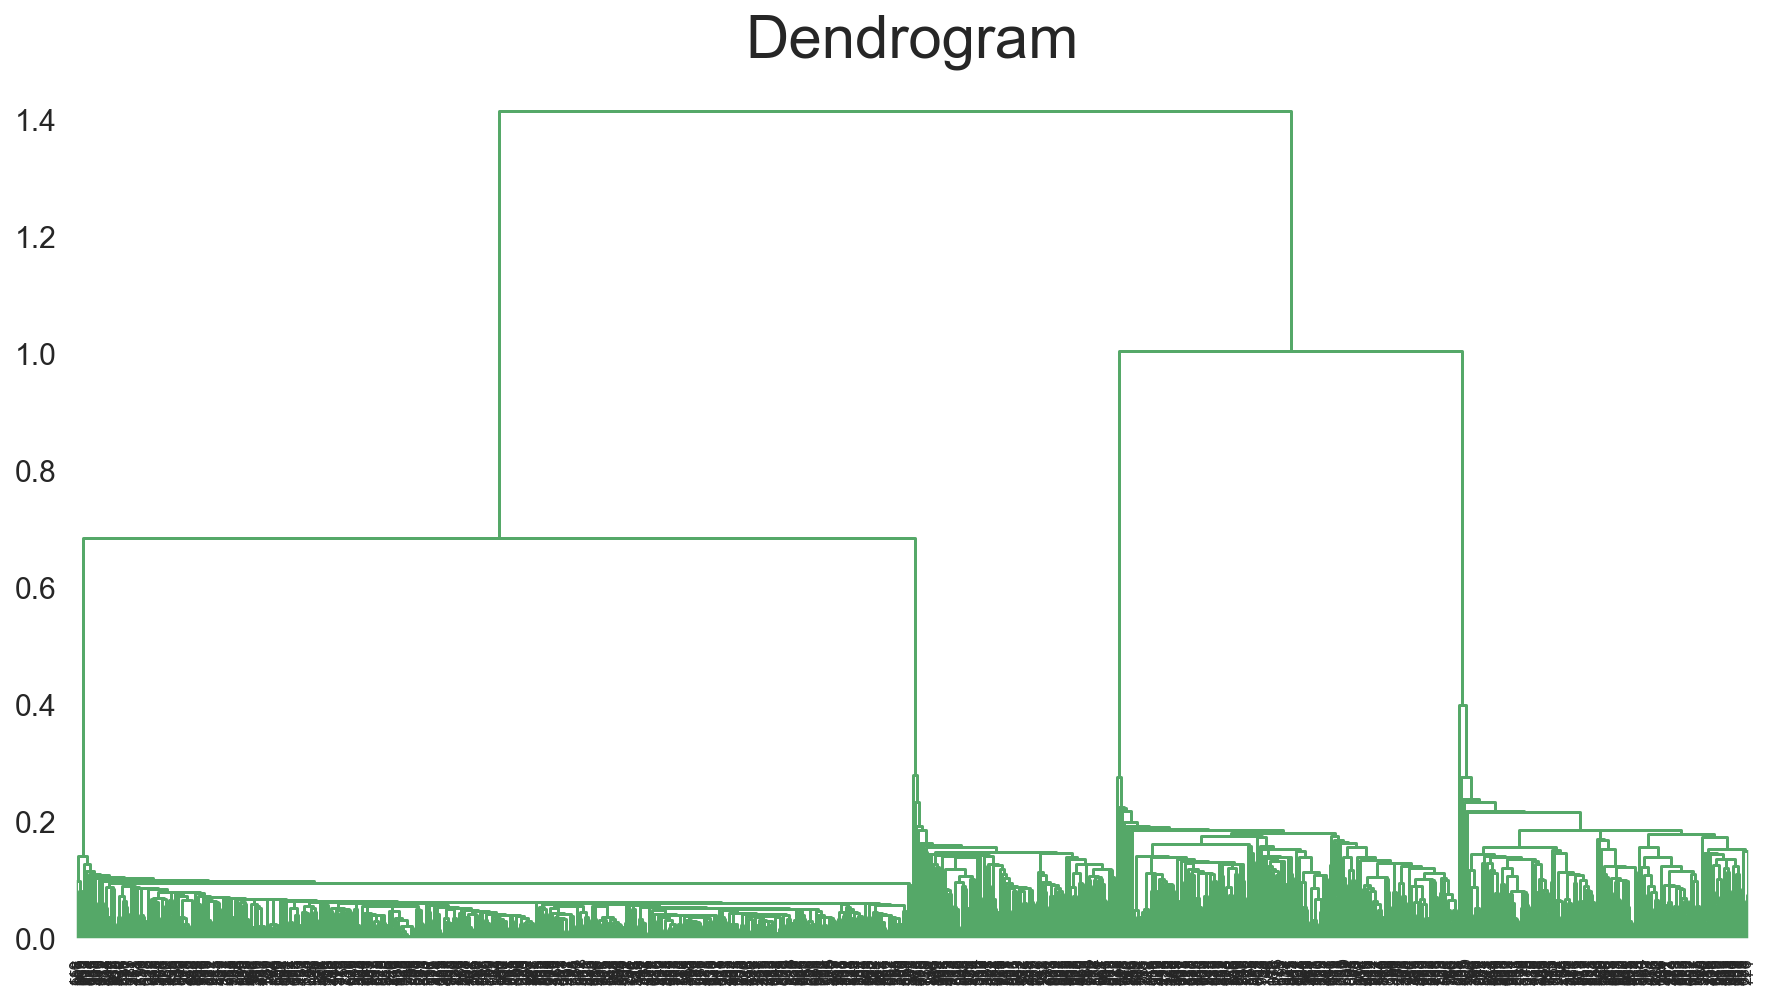

In [97]:
plt.figure(figsize=(15, 8))
dendrogram(
    Z,
    orientation='top',
    leaf_rotation=90.,  
    leaf_font_size=8.,
    color_threshold=2,
    #p = 10,
    #truncate_mode='level'
    #truncate_mode='lastp'
)
plt.yticks(fontsize=15.)
plt.title('Dendrogram',fontsize=30)

plt.show()

In [98]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [99]:
def plot_dendogram(X,  color_threshold=100, leaf_rotation=90, leaf_font_size=8.,
                   method='ward', metric='euclidean', ax=None, figsize=(15,15)):
    
    # Data prep
    
    Z = linkage(X, method=method, metric=metric)
    
    # plotting
    if ax==None:
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_title('Dendrogram')
        ax.set_xlabel('Index Numbers')
        ax.set_ylabel('Distance')
        dendrogram(
            Z,
            ax=ax,
            color_threshold=color_threshold, 
            leaf_rotation=leaf_rotation, 
            leaf_font_size=leaf_font_size
        )
    else:
        ax.set_title('Dendrogram')
        ax.set_xlabel('Index Numbers')
        ax.set_ylabel('Distance')
        dendrogram(
            Z,
            ax=ax,
            color_threshold=color_threshold, 
            leaf_rotation=leaf_rotation, 
            leaf_font_size=leaf_font_size
        )

    return ax
    


def plot_dist_thresh(X, max_value=100, color_threshold = 1, method='ward', metric='euclidean'):
    
    Z = linkage(X, method=method, metric=metric)
    clusters = fcluster(Z, max_value, criterion='distance')
    X['label'] = clusters
    labels = np.sort(X.label.unique())
    print("Clusters represented at distance: ", labels)
    
    
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))
    
    for label, color in zip(np.sort(X.label.unique()), colors):
        X_sub = X[X.label == label]
        ax[0].scatter(X_sub.iloc[:,0], X_sub.iloc[:,1], s=70, 
                   color=color, label=label, alpha=0.9)
    
    ax[0].set_title("Max Value: %d" % max_value)
    
    ax[0].legend(loc=[2.5,0], shadow=True, scatterpoints=1)
    
    t = (0, 10000)
    
    ax[1].plot(t, (max_value, max_value), 'r--')
    ax[1] = plot_dendogram(X.iloc[:, :2], color_threshold=color_threshold, method=method, metric=metric, ax=ax[1])
    
    return fig, ax

def plot_wrapper(max_value):
    plot_dist_thresh(X, max_value, color_threshold=10)
    plt.show()

In [100]:
interact(plot_wrapper, max_value=IntSlider(min=5, max=100, step=1))

interactive(children=(IntSlider(value=5, description='max_value', min=5), Output()), _dom_classes=('widget-int…

<function __main__.plot_wrapper(max_value)>